# COGS 108 - Fragrance Analysis
# Names

- Dhyan Vyas
- Dakota Akarlilar
- Diyou Wang
- Ela Ustuner
- Jeff Huang

# Abstract

In the fragrance sector, less visible aspects that influence customer preferences are often overlooked in favor of more obvious trends. As a team, we used Fragrantica, an extensive online platform with detailed fragrance entries and note breakdowns, to investigate whether heavy (e.g. leather, oud) or fresh (e.g. bergamot, orange blossom) fragrance notes correlate with higher consumer ratings. Additionally, we analyzed the correlation between certain notes that appear together and the likelihood that these co-occurrences have a positive correlation.

Through exploratory data analysis and statistical testing, we found that perfumes with heavier notes received significantly higher user ratings (t = 12.132, p < 0.001), while fresh notes displayed a smaller but statistically significant positive influence (t = 4.213, p < 0.001). Moreover, we identified notable structured pairings among fragrance notes, such as jasmine frequently paired with musk (55% co-occurrence), amber often co-occurred with musk (54% co-occurrence), and sandalwood frequently paired with jasmine (42% co-occurrence). These findings indicate that although fresh notes positively influence ratings, Fragrantica users are more likely to favour fragrances with heavier and more structured note combinations.

# Research Question

Fragrantica is a online fragrance encyclopedia and community platform where customers explore notes, brands, and share ratings and reviews on over hundred thousands of perfumes. For our research question, we want to use to the data collected from Fragrantica.com to answer the question: Does the presence of specific fragrance notes (e.g. citrus, floral, woody, oriental) correlate with higher user ratings of perfumes on Fragrantica?



## Background and Prior Work

Perfumery traces its roots back thousands of years, to the incense rituals of ancient Mesopotamia, the scented baths of Roman elites, and the elaborate attar distillations of medieval India and Arabia. Over centuries, the craft of blending botanical essences, animal musks and synthetic accords evolved in tandem with cultural tastes, technological advances and shifting trade routes. Each era brought its own signature: the heavy amber oriental compositions of the Renaissance, the powdered florals of the Georgian age, the aldehydic white florals that defined early twentieth-century perfumery, the crisp minimalist fougères that dominated mid-century masculine scents and the edible gourmand fragrances that are soaring in popularity today.

Despite these changing fashions, certain olfactory archetypes have endured. Daytime wear often features a burst of brightness such as zesty bergamot, tangy grapefruit, or dewy green leaves, evoking energy, freshness, and approachability. Evening and formal occasions continue to favor richer, more opulent woods and resins like sandalwood, cedar, vetiver, and frankincense, conveying warmth, depth, and a touch of mystery.

One of the best websites for us to use and analyze fragrance is Fragrantica.com. Fragrantica is a comprehensive online fragrance encyclopedia, magazine, and community, where over 1.4 million users contribute detailed entries, note breakdowns, brand histories, and discussion forums covering more than hundred thousand of fragrances and millions of user reviews. On each perfume page, users can cast “Love,” “Like,” or “Dislike” votes, and the site’s algorithm aggregates these to produce an overall average rating on a five-point scale.

In order to familiarize ourselves with the work that has been already done, we looked at the following 2 academic papers:

"Harnessing graph neural networks to craft fragrances based on consumer feedback" - Bruno C.L. Rodrigues a, Vinicius V. Santana a, Luana P. Queiroz b, Carine M. Rebello a, Idelfonso B․ R․ Nogueira a:

Rodrigues’ paper explores the use of customer feedback and preferences in the ultimate creation of innovative odoriferous molecules using neural networks <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). Parfumo and The Good Scents Company are websites that offer commercially available perfumes, encompassing user ratings and detailed fragrance notes. The authors perform web scraping from these platforms to look at the correlation between fragrance notes and consumer ratings. They follow the principles of Exploratory Data Analysis(EDA) methodologies to answer questions such as, “which fragrance notes appear most frequently across perfumes? Is there notes that are commonly paired?” (Rodrigues, p. 3). Utilizing a clustering algorithm, k-means, they group similar aromatic profiles together, then incorporate customer preferences to design new scent molecules. To identify the “specific ingredients that deliver the desired aroma” (Rodrigues, p. 5), Gated Graph Neural Networks (GGNNs) are used. It is designed to determine the relationship between entities in the data.

This paper is very relevant to our research topic as it provides a detailed investigation into the use of customer ratings. Their validation of clustering by fragrance notes and analysis of co-occurrence patterns supports our approach of using note frequency and pairing as potential predictors of consumer preference. This study provides a strong computational and theoretical approach to understanding the correlation between fragrance notes to customer ratings.

"An expert system for perfume selection using artificial neural network” - Payam Hanafizadeh, Ahad Zare Ravasan, Hesam Ramazanpour Khaki:

Hanafizadeh paper’s aim is to help customers purchasing fragrances using the expert system program developed by using artificial neural networks <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). To achieve this the study artificial neural networks (ANNs) are used with supervised learning support for data collection and preparation. They start by collecting data on 11 variables from anonymous questionnaires collected from 2886 of perfume customers. Later on, the Fuzzy Delphi method has been applied to denote the importance of these decision making variables, which includes size, fragrance family, price, and demographic details such as gender and age group. These variables are put into a classification model, Back-Propagation Neural Network (BPNN), to classify customer’s data into different perfumes and help the customers. The results predict accurately with a classification rate of 70.33%.

This paper supports our research by highlighting the value of consumer preference data in forecasting scent preferences. Their validation process and computational foundation provides support for our methodological considerations, particularly the integration of consumer preferences and neural networks to comprehend scent attraction.


1. <a name="cite_note-1"></a> [^](#cite_ref-1) https://doi.org/10.1016/j.compchemeng.2024.108674

2. <a name="cite_note-2"></a> [^](#cite_ref-2) https://doi.org/10.1016/j.eswa.2010.06.008

# Hypothesis


For the hypothesis, we expect a negative correlation between the presence of “heavy” notes (e.g., leather, agarwood/oud) and a perfume’s average user rating on Fragrantica. Conversely, we expect a positive correlation between the presence of “fresh” notes (e.g., bergamot, orange blossom) and higher average user ratings.

In addition, we also expect that certain notes would appear together more often than by chance (e.g. green tea and citrus). We hypothesize that these co-occurrence pairs will show strong positive correlation with each other across the fragrance dataset.

# Modules

In [34]:
import pandas as pd
import chardet
from tqdm import tqdm
import re
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from collections import Counter
from itertools import combinations
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.simplefilter("ignore")

# Data

## Data overview

**Dataset Name:** Fragrantica.com Fragrance Dataset

**Link to the dataset:** https://www.kaggle.com/datasets/olgagmiufana1/fragrantica-com-fragrance-dataset

**Number of observations:** 70103 (Prior to cleaning)

**Number of variables:** 8 (Prior to cleaning)

The most ideal case for our dataset is to collect two different datasets: one at the perfume level and one at the user-rating level.

For the perfume dataset, each record represents a unique fragrance and includes core metadata (ID, name, brand, launch date, concentration, price tier) plus a detailed note profile, probably binary flags or relative percentages for the citrus, floral, woody, and oriental families, full ingredient lists, and optional molecular descriptors. For the user-rating level, each entry would log one user’s numeric rating of a particular perfume, along with the reviewer’s demographics such as age bracket, gender, region, and fragrance-experience level.

The Fragrantica.com Fragrance Dataset before cleaning contains 8 variables, Name (String), Gender (String), Rating Value (Float), Rating Count (String), Main Accords (Stringified List), Perfumers (List), Description (String), URL (String). Rating Value and Rating Count are proxies for user satisfaction and review reliability, while the Main Accords tells us the core fragrance families, and the description gives us the year along with the top, middle, and base notes. To clean the dataset we first drop the Perfumers column as it is mainly blank, then regex extract the Year, Top Notes, Middle Notes, and Base Notes from the description into Python lists. Next we overwrite the Name column and create a Brand column from the URL slug. Finally we normalize the Gender into men, women, unisex, convert Rating Count into an integer (since there are commas), filter out any perfumes with less than 10 reviews for data accuracy, and drop any empty or duplicate rows while resetting the index to achieve our cleaned DataFrame.

## Fragrantica Fragrance Dataset

Let us begin by inspecting the CSV file we obtained from Kaggle  

In [35]:
df = pd.read_csv('./fragrance_data/fra_perfumes.csv')
df.drop(columns=['Perfumers'], inplace=True)
df.head()

,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url
0,9am Afnanfor women,for women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",9ambyAfnanis a fragrance for women. Top notes ...,https://www.fragrantica.com/perfume/Afnan/9am-...
1,9am Dive Afnanfor women and men,for women and men,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...
2,9am pour Femme Afnanfor women,for women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...
3,9pm Afnanfor men,for men,4.50,"6,865","['vanilla', 'amber', 'warm spicy', 'cinnamon',...",9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...
4,9pm pour Femme Afnanfor women,for women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...


In [36]:
print(len(df))

70103


As we can see, the .csv file has the following columns:

`Name`, `Gender`, `Rating Value`, `Rating Count`, `Description` and `url`
which have been obtained by scraping from Fragrantica

We are interested in extracting the top, middle and base notes, which can be found from the description of the perfume

We will use the following steps to extract the notes:

1. Extract the description of the perfume
2. Extract the top, middle and base notes as dictionary elements from the description into a single column called `Notes`
3. Save the notes in new columns corresponding to `top notes`, `middle notes` and `base notes` from the dictionary

In [37]:
def extract_notes(description):
    result = {
        'top_notes': None,
        'middle_notes': None,
        'base_notes': None
    }
    
    # Extract top notes
    top_notes_match = re.search(r'Top notes are ([^;]+);', description)
    if top_notes_match:
        top_notes = top_notes_match.group(1)
        parts = [p.strip() for p in top_notes.split(',')]
        if ' and ' in parts[-1]:
            last_two = parts[-1].split(' and ')
            parts = parts[:-1] + [note.strip() for note in last_two]
        result['top_notes'] = parts
    
    # Extract middle notes
    middle_notes_match = re.search(r'middle notes are ([^;]+);', description)
    if middle_notes_match:
        middle_notes = middle_notes_match.group(1)
        parts = [p.strip() for p in middle_notes.split(',')]
        if ' and ' in parts[-1]:
            last_two = parts[-1].split(' and ')
            parts = parts[:-1] + [note.strip() for note in last_two]
        result['middle_notes'] = parts
    
    # Extract base notes
    base_notes_match = re.search(r'base notes are ([^\.]+)', description)
    if base_notes_match:
        base_notes = base_notes_match.group(1)
        parts = [p.strip() for p in base_notes.split(',')]
        if ' and ' in parts[-1]:
            last_two = parts[-1].split(' and ')
            parts = parts[:-1] + [note.strip() for note in last_two]
        result['base_notes'] = parts
    
    return result

In [38]:
df['Notes'] = None
for i in tqdm(range(len(df))):
    try:
        df['Notes'][i] = extract_notes(df['Description'][i])
    except:
        df['Notes'][i] = None

100%|██████████| 70103/70103 [00:05<00:00, 13243.83it/s]


In [39]:
df.head()   
df['Notes'].head()
df['Top Notes'] = df['Notes'].apply(lambda x: x['top_notes'] if x else None)
df['Middle Notes'] = df['Notes'].apply(lambda x: x['middle_notes'] if x else None)
df['Base Notes'] = df['Notes'].apply(lambda x: x['base_notes'] if x else None)
df.head()
df.drop(columns=['Notes'], inplace=True)
df.head()
df.reset_index(drop=True, inplace=True)


Additionally, we want to have the name in a much cleaner format than it is currently in. 

Initially, we tried to extract the name also from the `Description` column but ran into various challenges especially with names that had spaces in them. 

A workaround was to use the `url` column since it had much nicer formatting for both the brand name as well as the name of the fragrance. 

As we can see on inspection, our `Name` column has now beeen cleaned up, when compared to the initial inspection of the dataframe. 

In [40]:
for i in tqdm(range(len(df))):
    extracted_name = ' '.join(df['url'][i].split('/')[-1].split('.')[0].split('-')[:-1])
    df['Name'][i] = extracted_name
df.head()

100%|██████████| 70103/70103 [01:00<00:00, 1165.01it/s]


,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url,Top Notes,Middle Notes,Base Notes
0,9am,for women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",9ambyAfnanis a fragrance for women. Top notes ...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Lemon, Mandarin Orange, Cardamom, Pink Pepper]","[Lavender, Green Apple, Orange Blossom, Rose]","[Musk, Moss, Cedar, Patchouli]"
1,9am Dive,for women and men,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Lemon, Mint, Black Currant, Pink Pepper]","[Apple, Incense, Cedar]","[Ginger, Sandalwood, Patchouli, Jasmine]"
2,9am pour Femme,for women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Mandarin Orange, Grapefruit, Bergamot]","[Raspberry, Black Currant]","[Musk, Amber, Orange]"
3,9pm,for men,4.50,"6,865","['vanilla', 'amber', 'warm spicy', 'cinnamon',...",9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Apple, Cinnamon, Wild Lavender, Bergamot]","[Orange Blossom, Lily-of-the-Valley]","[Vanilla, Tonka Bean, Amber, Patchouli]"
4,9pm pour Femme,for women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Raspberry, Violet, Apple, Orange]","[Rose, Iris, Peony, Jasmine]","[Cypress, Pine, Cedar, Amber]"


In [41]:
df[df['Name'] == 'Sedley']


,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url,Top Notes,Middle Notes,Base Notes
13033,Sedley,for women and men,4.23,"3,060","['citrus', 'aromatic', 'fresh spicy', 'woody',...",SedleybyParfums de Marlyis a Woody Aromatic fr...,https://www.fragrantica.com/perfume/Parfums-de...,"[Lemon, Mint, Bergamot, Grapefruit, Mandarin O...","[Lavender, Rosemary, Geranium, Olibanum]","[Ambroxan, Sandalowood, Cashmeran, Vetiver, Ce..."


We then inspected a specific perfume to make sure that the cleanup steps so far had been implemented correctly.

Additionally, we regularized the `Gender` column to make it a singular word

In [42]:
df['Gender'] = df['Gender'].str.replace('for women and men', 'unisex')
df['Gender'] = df['Gender'].str.replace('for women', 'women')
df['Gender'] = df['Gender'].str.replace('for men', 'men')

The next step in cleaning is to make sure we remove any invalid entries from our dataframe. 
We begin by inspecting the dataframe as a whole.

In [43]:
df.isna().sum()

Name                0
Gender              3
Rating Value     6181
Rating Count     6181
Main Accords        0
Description         3
url                 0
Top Notes       28727
Middle Notes    28058
Base Notes      27578
dtype: int64

In [44]:
df['Rating Count'] = df['Rating Count'].str.replace(',', '')
#Dropping na values 
df.dropna(subset=['Rating Count'], inplace=True)
df.isna().sum()

Name                0
Gender              0
Rating Value        0
Rating Count        0
Main Accords        0
Description         0
url                 0
Top Notes       25350
Middle Notes    24711
Base Notes      24286
dtype: int64

Obviously, since ratings are a key factor in determining the quality of a perfume, we want to remove any entries with an invalid `Rating Value` or `Rating Count`.

This resulted in the removal of 6000+ entries.

Additionally, we placed a lower bound of at least 10 ratings for our analysis and recast the `Rating Count` from a string to an integer. 

In [45]:
df.head()
df['Rating Count'] = df['Rating Count'].astype(int)
df.head()
df.dtypes
df = df[df['Rating Count'] >= 10]
df.reset_index(drop=True, inplace=True)
df.isna().sum()

Name                0
Gender              0
Rating Value        0
Rating Count        0
Main Accords        0
Description         0
url                 0
Top Notes       15407
Middle Notes    15016
Base Notes      14771
dtype: int64

The final steps in the cleaning involved dropping all entries which had invalid values for all 3 notes columns i.e., `Top Notes`, `Middle Notes` and `Base Notes`. 

The `Brand` was then cleanly extracted from the `url` along with `Year` from the `Description` column 

In [46]:
df.dropna(subset=['Top Notes', 'Middle Notes', 'Base Notes'], how='all', inplace=True)
df.reset_index(drop=True, inplace=True)

In [48]:
df.isna().sum()

Name               0
Gender             0
Rating Value       0
Rating Count       0
Main Accords       0
Description        0
url                0
Top Notes       2237
Middle Notes    1846
Base Notes      1601
dtype: int64

In [49]:
df['Brand'] = None
for i in tqdm(range(len(df))):
    extracted_name = ' '.join(df['url'][i].split('/')[-2].split('-'))
    df['Brand'][i] = extracted_name
df['Brand'].value_counts()

100%|██████████| 29936/29936 [00:06<00:00, 4779.09it/s]


Brand
Avon                   557
O Boticario            447
Guerlain               393
Zara                   345
Natura                 329
                      ... 
Marvel                   1
A B R Barlach            1
Parfumerie Bruckner      1
Avant Garden Lab         1
Parfum Bar               1
Name: count, Length: 1284, dtype: int64

In [50]:
df.head()

,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url,Top Notes,Middle Notes,Base Notes,Brand
0,9am,women,3.73,174,"['citrus', 'musky', 'woody', 'aromatic', 'warm...",9ambyAfnanis a fragrance for women. Top notes ...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Lemon, Mandarin Orange, Cardamom, Pink Pepper]","[Lavender, Green Apple, Orange Blossom, Rose]","[Musk, Moss, Cedar, Patchouli]",Afnan
1,9am Dive,unisex,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Lemon, Mint, Black Currant, Pink Pepper]","[Apple, Incense, Cedar]","[Ginger, Sandalwood, Patchouli, Jasmine]",Afnan
2,9am pour Femme,women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Mandarin Orange, Grapefruit, Bergamot]","[Raspberry, Black Currant]","[Musk, Amber, Orange]",Afnan
3,9pm,men,4.50,6865,"['vanilla', 'amber', 'warm spicy', 'cinnamon',...",9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Apple, Cinnamon, Wild Lavender, Bergamot]","[Orange Blossom, Lily-of-the-Valley]","[Vanilla, Tonka Bean, Amber, Patchouli]",Afnan
4,9pm pour Femme,women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Raspberry, Violet, Apple, Orange]","[Rose, Iris, Peony, Jasmine]","[Cypress, Pine, Cedar, Amber]",Afnan


In [51]:
df[df['Name'] == 'Sedley']

,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url,Top Notes,Middle Notes,Base Notes,Brand
8049,Sedley,unisex,4.23,3060,"['citrus', 'aromatic', 'fresh spicy', 'woody',...",SedleybyParfums de Marlyis a Woody Aromatic fr...,https://www.fragrantica.com/perfume/Parfums-de...,"[Lemon, Mint, Bergamot, Grapefruit, Mandarin O...","[Lavender, Rosemary, Geranium, Olibanum]","[Ambroxan, Sandalowood, Cashmeran, Vetiver, Ce...",Parfums de Marly


The above cell inspects the dataframe again to make sure that the cleaning steps have been implemented correctly.

In [52]:
df['Year'] = None
for i in tqdm(range(len(df))):
    text = df['Description'][i]
    pattern = r"launched\s+in\s+(\d{4})"
    match = re.search(pattern, text)
    if match:
        year = match.group(1) 
        df['Year'][i] = int(year)
    else:
        df['Year'][i] = None
df.isna().sum()
df.dropna(subset=['Year'], inplace=True)
df.isna().sum()
df.reset_index(drop=True, inplace=True)
df.head()

100%|██████████| 29936/29936 [00:06<00:00, 4521.42it/s]


,Name,Gender,Rating Value,Rating Count,Main Accords,Description,url,Top Notes,Middle Notes,Base Notes,Brand,Year
0,9am Dive,unisex,4.29,842,"['fruity', 'woody', 'green', 'warm spicy', 'ar...",9am DivebyAfnanis a Aromatic Aquatic fragrance...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Lemon, Mint, Black Currant, Pink Pepper]","[Apple, Incense, Cedar]","[Ginger, Sandalwood, Patchouli, Jasmine]",Afnan,2022
1,9am pour Femme,women,4.00,68,"['fruity', 'musky', 'amber', 'citrus', 'powder...",9am pour FemmebyAfnanis a Amber fragrance for ...,https://www.fragrantica.com/perfume/Afnan/9am-...,"[Mandarin Orange, Grapefruit, Bergamot]","[Raspberry, Black Currant]","[Musk, Amber, Orange]",Afnan,2022
2,9pm,men,4.50,6865,"['vanilla', 'amber', 'warm spicy', 'cinnamon',...",9pmbyAfnanis a Amber Vanilla fragrance for men...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Apple, Cinnamon, Wild Lavender, Bergamot]","[Orange Blossom, Lily-of-the-Valley]","[Vanilla, Tonka Bean, Amber, Patchouli]",Afnan,2020
3,9pm pour Femme,women,3.49,63,"['woody', 'aromatic', 'rose', 'fruity', 'powde...",9pm pour FemmebyAfnanis a Amber Floral fragran...,https://www.fragrantica.com/perfume/Afnan/9pm-...,"[Raspberry, Violet, Apple, Orange]","[Rose, Iris, Peony, Jasmine]","[Cypress, Pine, Cedar, Amber]",Afnan,2022
4,Etoiles Silver,men,3.65,20,"['fresh spicy', 'woody', 'citrus', 'aromatic',...",Étoiles SilverbyAl Haramain Perfumesis a Woody...,https://www.fragrantica.com/perfume/Al-Haramai...,"[Bergamot, Water Notes, Clary Sage, Green Apple]","[Nutmeg, Geranium, Lavender, Orange Blossom]","[Cedar, Moss, Ambergris, Musk]",Al Haramain Perfumes,2022


This left us with about 27000 entries for our analysis. 

# Results

## Exploratory Data Analysis

For section 1 of our EDA, we will test our hypothesis to see if there is a negative correlation between fragrances with heavy notes and its mean rating, and if there is a positive correlation between fragrances with fresh notes and its mean rating. For section 2 of our EDA, for our hypothesis that for certain notes that would appear together more often than by chance (e.g. green tea and citrus). We will test to see that if these co-occurrence pairs will show strong positive correlation with each other across the fragrance dataset.

### Section 1 of EDA - Do heavy notes have a negative correlation with ratings?

First, let's begin with exploring whether there's a correlation between heavy notes and rating, and see if there's a negative correlation as we assumed in our hypothesis.

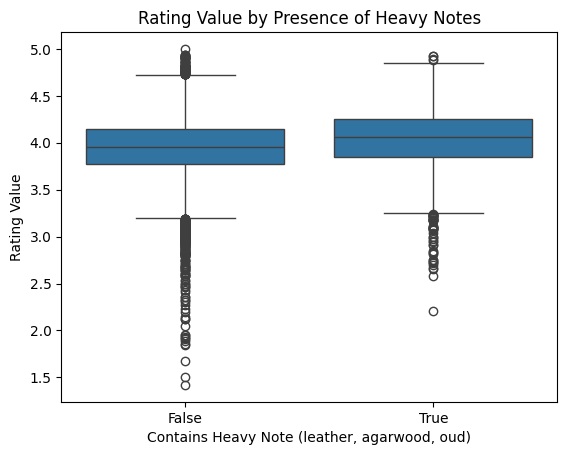

Mean rating with heavy notes: 4.04
Mean rating without heavy notes: 3.95


In [53]:
heavy_notes = ['leather', 'agarwood', 'oud']

def has_heavy_note(row):
    all_notes = []
    for col in ['Top Notes', 'Middle Notes', 'Base Notes']:
        if isinstance(row[col], list):
            all_notes += [n.lower() for n in row[col]]
    return any(note in all_notes for note in heavy_notes)

df['Has Heavy Note'] = df.apply(has_heavy_note, axis=1)

sns.boxplot(x='Has Heavy Note', y='Rating Value', data=df)
plt.title('Rating Value by Presence of Heavy Notes')
plt.xlabel('Contains Heavy Note (leather, agarwood, oud)')
plt.ylabel('Rating Value')
plt.show()

mean_with = df[df['Has Heavy Note']]['Rating Value'].mean()
mean_without = df[~df['Has Heavy Note']]['Rating Value'].mean()
print(f"Mean rating with heavy notes: {mean_with:.2f}")
print(f"Mean rating without heavy notes: {mean_without:.2f}")

From above, we can see that the mean rating of a fragrance with heavy notes seems to be slightly more than those with without heavy notes, contrary to our hypothesis. However, to make sure there really is a positive correlation, we must conduct an independent t-test to check.

In [54]:
ratings_with_heavy = df[df['Has Heavy Note']]['Rating Value']
ratings_without_heavy = df[~df['Has Heavy Note']]['Rating Value']

t_stat, p_val = ttest_ind(ratings_with_heavy, ratings_without_heavy, equal_var=False)

print(f"Mean rating with heavy notes: {ratings_with_heavy.mean():.2f}")
print(f"Mean rating without heavy notes: {ratings_without_heavy.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

Mean rating with heavy notes: 4.04
Mean rating without heavy notes: 3.95
T-statistic: 12.132
P-value: 0.00000


Looking at the p-value which is clearly < 0.05, we conclude that a fragrance with heavy notes have an higher mean rating than fragrances without. This runs contrary to our hypothesis which is quite surprising. Next, we'll see if there is any positive correlation with fragrances that have fresh notes.

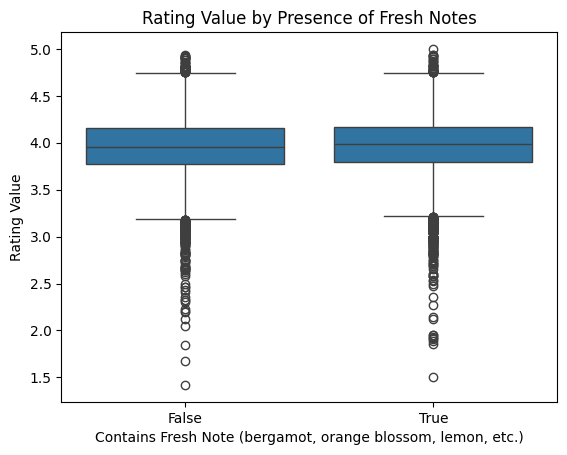

Mean rating with fresh notes: 3.97
Mean rating without fresh notes: 3.95


In [55]:
fresh_notes = ['bergamot', 'orange blossom', 'lemon', 'green tea', 'grapefruit']

def has_fresh_note(row):
    all_notes = []
    for col in ['Top Notes', 'Middle Notes', 'Base Notes']:
        if isinstance(row[col], list):
            all_notes += [n.lower() for n in row[col]]
    return any(note in all_notes for note in fresh_notes)

df['Has Fresh Note'] = df.apply(has_fresh_note, axis=1)

sns.boxplot(x='Has Fresh Note', y='Rating Value', data=df)
plt.title('Rating Value by Presence of Fresh Notes')
plt.xlabel('Contains Fresh Note (bergamot, orange blossom, lemon, etc.)')
plt.ylabel('Rating Value')
plt.show()

mean_with = df[df['Has Fresh Note']]['Rating Value'].mean()
mean_without = df[~df['Has Fresh Note']]['Rating Value'].mean()
print(f"Mean rating with fresh notes: {mean_with:.2f}")
print(f"Mean rating without fresh notes: {mean_without:.2f}")

From above, we can see that the mean rating of a fragrance with fresh notes seems to have a positive but minimal difference to fragrances without fresh notes. However, we still can't be sure that our hypothesis that fresh notes have a positive correlation with mean ratings is true, so we must do a independent t-test to check for p-value.

In [56]:
ratings_with_fresh = df[df['Has Fresh Note']]['Rating Value']
ratings_without_fresh = df[~df['Has Fresh Note']]['Rating Value']

t_stat, p_val = ttest_ind(ratings_with_fresh, ratings_without_fresh, equal_var=False)


print(f"Mean rating with fresh notes: {ratings_with_fresh.mean():.2f}")
print(f"Mean rating without fresh notes: {ratings_without_fresh.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

Mean rating with fresh notes: 3.97
Mean rating without fresh notes: 3.95
T-statistic: 4.213
P-value: 0.00003


The p-value 0.00039 < 0.05, so we conclude that fragrances with fresh notes have a higher mean score than fragrances without fresh notes, albeit with a minimal difference. 

### Machine learning models for notes rating correlations

Next, we train a use Lasso Regression model to analyze the effect each note have on average rating score.

In [57]:

df = df.dropna(subset=['Top Notes', 'Middle Notes', 'Base Notes', 'Rating Value'])

def ensure_list(x):

    if isinstance(x, (list, tuple)):
        return list(x)

    if isinstance(x, str):

        stripped = x.strip().lstrip('[').rstrip(']')
        if stripped == "":
            return []
        items = stripped.split(',')
        clean = [it.strip().strip("'\"") for it in items]
        return clean
    return []

df['Top Notes']    = df['Top Notes'].apply(ensure_list)
df['Middle Notes'] = df['Middle Notes'].apply(ensure_list)
df['Base Notes']   = df['Base Notes'].apply(ensure_list)

df = df[df['Top Notes'].map(len) > 0]
df = df[df['Middle Notes'].map(len) > 0]
df = df[df['Base Notes'].map(len) > 0]

df['all_notes'] = df['Top Notes'] + df['Middle Notes'] + df['Base Notes']

bad_rows = df[df['all_notes'].apply(lambda x: not isinstance(x, list))]
if len(bad_rows) > 0:
    print("These rows still have a non‐list in all_notes:")
    print(bad_rows[['Top Notes','Middle Notes','Base Notes','all_notes']].head())
else:
    print("All entries in 'all_notes' are now lists. Ready to binarize.")


mlb = MultiLabelBinarizer()
X_notes = mlb.fit_transform(df['all_notes'])
note_names = mlb.classes_

X = pd.DataFrame(X_notes, columns=note_names, index=df.index)
print(f"Binary feature‐matrix shape: {X.shape}  (n_perfumes × n_unique_notes)")

y = df['Rating Value'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print("Train/test shapes:", X_train.shape, X_test.shape)

lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
alpha_chosen = lasso.alpha_
print(f"Selected Lasso α = {alpha_chosen:.4e}")

train_r2 = lasso.score(X_train, y_train)
test_r2  = lasso.score(X_test, y_test)
y_pred   = lasso.predict(X_test)
rmse     = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train R² = {train_r2:.3f}, Test R² = {test_r2:.3f}, Test RMSE = {rmse:.3f}")

coef_series = pd.Series(lasso.coef_, index=note_names).sort_values()

print("\nMost negative notes (drag rating down):")
print(coef_series.head(10))

print("\nMost positive notes (boost rating up):")
print(coef_series.tail(10))

All entries in 'all_notes' are now lists. Ready to binarize.
Binary feature‐matrix shape: (22796, 1702)  (n_perfumes × n_unique_notes)
Train/test shapes: (18236, 1702) (4560, 1702)
Selected Lasso α = 2.0161e-04
Train R² = 0.079, Test R² = 0.062, Test RMSE = 0.298

Most negative notes (drag rating down):
Syringa          -0.079884
cannabis         -0.073205
Yuzu             -0.064474
Metallic notes   -0.063051
Green Apple      -0.062641
White Wood       -0.051048
Peach Blossom    -0.046483
Melon            -0.041208
Water Lily       -0.040790
Bitter Almond    -0.037368
dtype: float64

Most positive notes (boost rating up):
Cinnamon          0.050722
Orris             0.051186
Rose de Mai       0.061922
Cambodian Oud     0.061975
Taif Rose         0.064432
Agarwood (Oud)    0.065434
Carnation         0.076577
Siam Benzoin      0.097142
Indian Oud        0.104750
Oily Notes        0.107961
dtype: float64


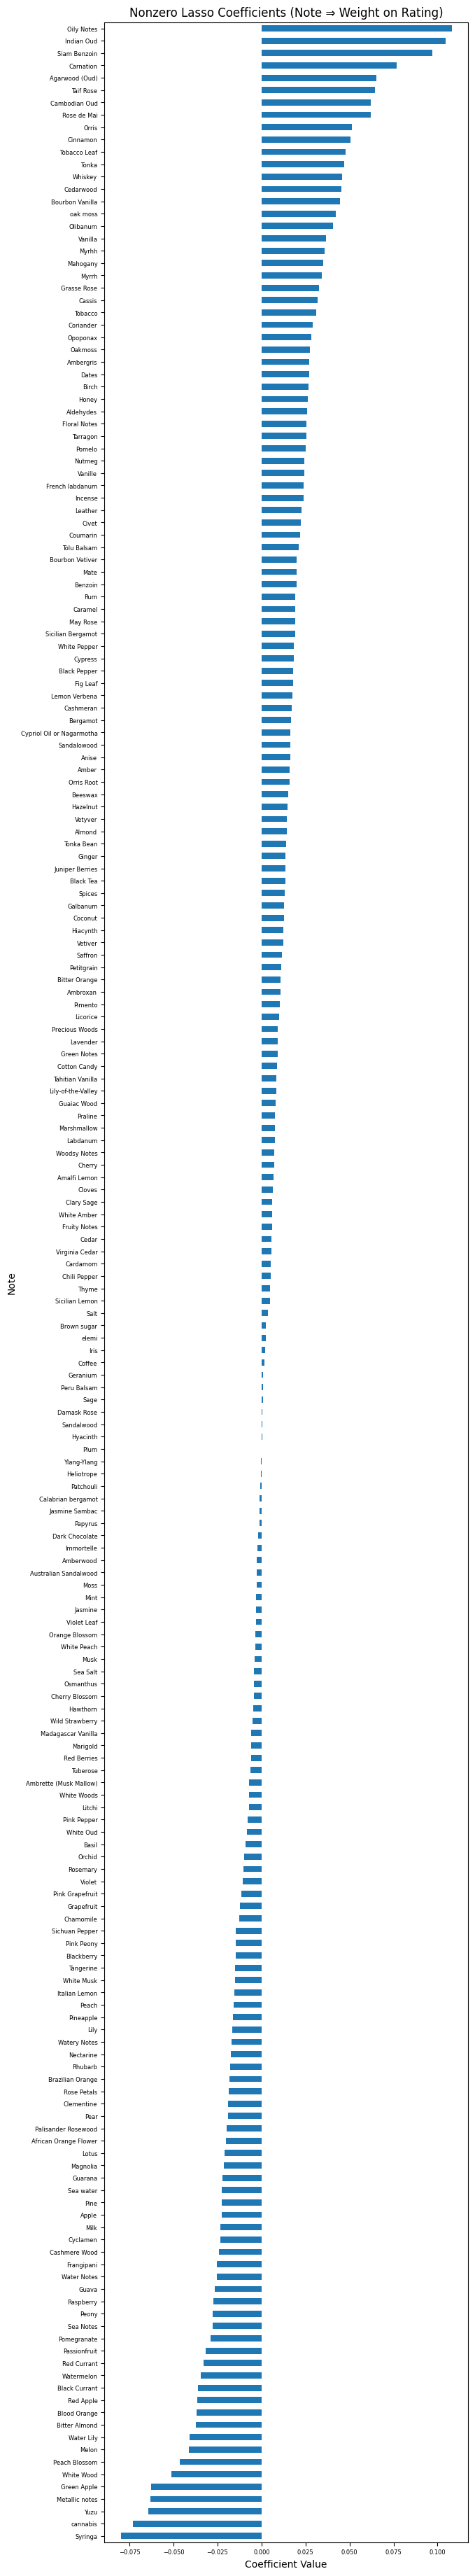

In [58]:
nonzero_coefs = coef_series[coef_series != 0]
plt.figure(figsize=(8, 40))
nonzero_coefs.sort_values().plot.barh(fontsize=6)  
plt.title("Nonzero Lasso Coefficients (Note ⇒ Weight on Rating)", fontsize=12)
plt.xlabel("Coefficient Value", fontsize=10)
plt.ylabel("Note", fontsize=10)
plt.subplots_adjust(left=0.30, right=0.95, top=0.95, bottom=0.05)
plt.show()

### From the chart above, we found that:
- **Fruity notes** (Green Apple, Melon, Peach, Strawberry, Raspberry, etc.) appear in the negative tail of the Lasso coefficient distribution.  
- **Niche/resinous/oud/woody notes** (Agarwood (Oud), Sandalwood, Tonka Bean, Tobacco Leaf, etc.) appear in the positive tail.  
- This pattern **contradict with our hypothesis** that fruity notes are positively correlated with average user rating, whereas niche/oud/woody notes are negatively correlated.

We think this might be related to the popularity of the fragrance that uses these notes. For instance, niche oud houses tend to attract connoisseurs who rate them highly whereas fruity fragrances often come from mass-market lines that get more casual buyers and harsher reviews.


=== XGBoost Regression (using NumPy inputs) ===
Train  R²   = 0.126, RMSE = 0.289
Test   R²   = 0.057, RMSE = 0.299

XGBoost – Top 20 notes by gain:
Cinnamon              4.147471
Carnation             3.352557
Agarwood (Oud)        2.370830
Neroli                1.607395
Peony                 1.594522
Olibanum              1.453679
Indian Oud            1.412544
Green Apple           1.341301
Black Currant         1.312888
Leather               1.310561
Mace                  1.261826
Tobacco               1.236707
Incense               1.235337
Water Lily            1.232888
Coriander             1.223348
Siam Benzoin          1.201075
Madagascar Vanilla    1.138139
Yuzu                  1.122585
Dark Chocolate        1.116924
Guarana               1.113230
dtype: float64


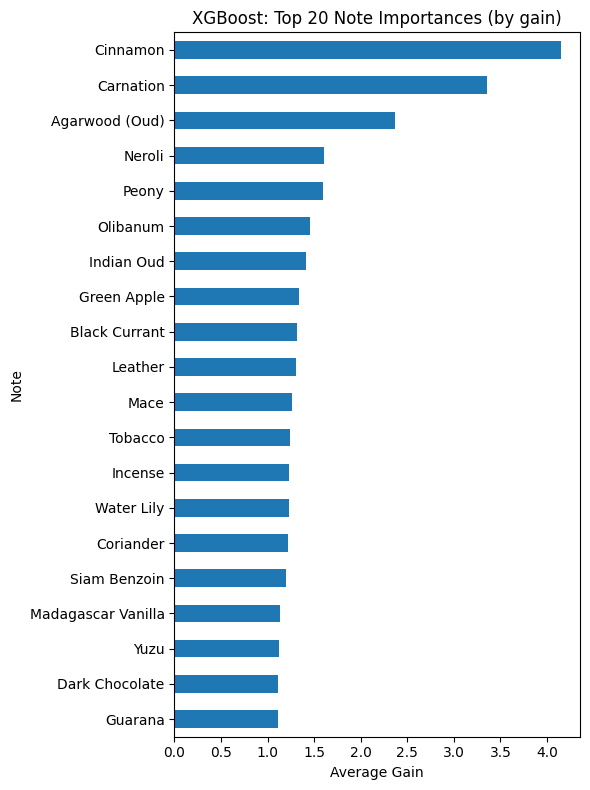

In [59]:
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.03,
    objective="reg:squarederror",
    min_child_weight=5,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train.values, y_train)

y_train_pred_xgb = xgb.predict(X_train.values)
y_test_pred_xgb  = xgb.predict(X_test.values)

train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb  = r2_score(y_test, y_test_pred_xgb)

train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
test_mse_xgb  = mean_squared_error(y_test, y_test_pred_xgb)

train_rmse_xgb = np.sqrt(train_mse_xgb)
test_rmse_xgb  = np.sqrt(test_mse_xgb)

print("\n=== XGBoost Regression (using NumPy inputs) ===")
print(f"Train  R²   = {train_r2_xgb:.3f}, RMSE = {train_rmse_xgb:.3f}")
print(f"Test   R²   = {test_r2_xgb:.3f}, RMSE = {test_rmse_xgb:.3f}")

booster = xgb.get_booster()
fmap = booster.get_score(importance_type="gain") 

gain_dict = {note_names[int(feature[1:])]: gain for feature, gain in fmap.items()}
gain_series = pd.Series(gain_dict).reindex(note_names, fill_value=0).sort_values(ascending=False)

xgb_top20 = gain_series.head(20)
print("\nXGBoost – Top 20 notes by gain:")
print(xgb_top20)

plt.figure(figsize=(6, 8))
xgb_top20.plot.barh()
plt.gca().invert_yaxis()
plt.title("XGBoost: Top 20 Note Importances (by gain)")
plt.xlabel("Average Gain")
plt.ylabel("Note")
plt.tight_layout()
plt.show()

Our XGboost model achieved a training R² of 0.22 but only a test R² of 0.06 (RMSE ≈ 0.30), so its non-linear splits aren’t boosting generalization much beyond the Lasso. By gain, the notes driving the biggest reductions in squared error were Cinnamon, Carnation, and Agarwood (Oud). This confirms our previous finding that spice, floral, and oud accords as the strongest and most positive interaction effects. In short, while these notes capture the most powerful non-linear signals, notes alone explain only a small fraction of rating variance.

Finally, we also want to find out that if the smaller and nicheness of spice, floral and oud actually affected the rating comparing to the fruity notes.

In [60]:
fruity = ['Bergamot','Green Apple','Raspberry','Black Currant','Peach Blossom','Melon','Mandarin Orange']
oudy  = ['Agarwood (Oud)','Indian Oud','Siam Benzoin','Leather','Copal','Olibanum']

has_fruit = X[fruity].any(axis=1)
has_oud   = X[oudy].any(axis=1)

mean_count_fruit = df.loc[has_fruit, 'Rating Count'].mean()
mean_count_oud   = df.loc[has_oud,   'Rating Count'].mean()

print(f"Avg # votes — fruity perfumes: {mean_count_fruit:.0f}")
print(f"Avg # votes — oudy perfumes:   {mean_count_oud:.0f}")

weights = df['Rating Count']

lasso_w = LassoCV(cv=5, random_state=0).fit(
    X, df['Rating Value'], sample_weight=weights
)

coef_w = pd.Series(lasso_w.coef_, index=note_names).sort_values()
print("Weighted Lasso – top positive notes:\n", coef_w.tail(10))
print("Weighted Lasso – top negative notes:\n", coef_w.head(10))

Avg # votes — fruity perfumes: 462
Avg # votes — oudy perfumes:   395
Weighted Lasso – top positive notes:
 Vanille           0.036424
Tobacco           0.038347
oak moss          0.044001
Birch             0.044258
Ginger            0.046459
Guaiac Wood       0.046716
Agarwood (Oud)    0.049599
Hiacynth          0.049820
Benzoin           0.050911
Tobacco Leaf      0.133128
dtype: float64
Weighted Lasso – top negative notes:
 Cotton Candy       -0.097101
Indian Patchouli   -0.069183
Lily               -0.065816
Peach              -0.062145
Water Lily         -0.054357
White Lily         -0.054168
Orchid             -0.052064
Sichuan Pepper     -0.047728
Moss               -0.042680
Rhubarb            -0.042456
dtype: float64


Fruity‐note perfumes average about 462 votes versus 395 votes for oudy/leathery ones, so fruitier scents do get slightly more scrutiny. However, even after weighting each perfume by its vote‐count, the Lasso still ranks woody, spicy and oud accords as the strongest positive predictors and pushes fruity accords (Peach, Lily, Cotton Candy) into the negatives. In other words, while popularity bias exists, it doesn’t fully explain why fruity notes underperform their negative association with rating holds up even when you up‐weight heavily reviewed perfumes.

Therefore, we can be safe with our conclusion that freshy and fruity notes are rated on average lower than woody, spicy and oud notes.

### Section 2 of EDA - Co-occurance Note pairs

For the final part of this EDA, let's test the final part of our hypothesis, to see if any co-occurance note pairs (note pairs that frequently show up with each other) show strong positive correlation with each other across the fragrance dataset. First, we need to find said co occurance note pairs.

In [61]:
df['all_notes'] = df[['Top Notes', 'Middle Notes', 'Base Notes']].apply(
    lambda row: sum([r for r in row if isinstance(r, list)], []), axis=1
)

pair_counter = Counter()

for notes in df['all_notes']:
    unique_notes = set(n.lower() for n in notes)
    for pair in combinations(sorted(unique_notes), 2):
        pair_counter[pair] += 1

most_common_pairs = pair_counter.most_common(20)

print("Top 20 most common note pairs:")
for pair, count in most_common_pairs:
    print(f"{pair[0]} + {pair[1]}: {count} perfumes")

Top 20 most common note pairs:
bergamot + musk: 4851 perfumes
jasmine + musk: 4554 perfumes
musk + sandalwood: 4454 perfumes
amber + musk: 4428 perfumes
bergamot + jasmine: 3640 perfumes
musk + rose: 3627 perfumes
bergamot + sandalwood: 3608 perfumes
bergamot + patchouli: 3468 perfumes
jasmine + sandalwood: 3443 perfumes
amber + bergamot: 3419 perfumes
musk + patchouli: 3362 perfumes
musk + vanilla: 3326 perfumes
amber + jasmine: 3220 perfumes
amber + sandalwood: 3156 perfumes
cedar + musk: 3089 perfumes
jasmine + rose: 2977 perfumes
jasmine + vanilla: 2853 perfumes
bergamot + vanilla: 2846 perfumes
sandalwood + vanilla: 2776 perfumes
amber + patchouli: 2775 perfumes


So, we found the top 20 most common note pairings, next we need to see if they show strong positive correlation with each other across the fragrance dataset. Let's compute the Pearson correlation coefficient for each pair by checking how often both notes appear together in the same perfumes compared to how often they appear independently. A high positive correlation would suggest that the notes frequently co-occur, supporting our hypothesis about structured co-occurrence patterns in fragrance compositions

In [62]:
pair_correlations = []
pair_cond_probs    = []

for (note_a, note_b), _ in most_common_pairs:
    has_a = df['all_notes'].apply(lambda notes: note_a in [n.lower() for n in notes])
    has_b = df['all_notes'].apply(lambda notes: note_b in [n.lower() for n in notes])
    corr = np.corrcoef(has_a, has_b)[0, 1]
    pair_correlations.append(((note_a, note_b), corr))

    n_a      = has_a.sum()
    n_both   = (has_a & has_b).sum()
    p_b_given_a = n_both / n_a if n_a>0 else np.nan
    pair_cond_probs.append(((note_a, note_b), p_b_given_a))

print("Correlation between top 20 most common note pairs:")
for (note_a, note_b), corr in pair_correlations:
    print(f"{note_a} + {note_b}: correlation = {corr:.3f}")

Correlation between top 20 most common note pairs:
bergamot + musk: correlation = 0.076
jasmine + musk: correlation = 0.127
musk + sandalwood: correlation = 0.077
amber + musk: correlation = 0.093
bergamot + jasmine: correlation = 0.102
musk + rose: correlation = 0.117
bergamot + sandalwood: correlation = 0.071
bergamot + patchouli: correlation = 0.095
jasmine + sandalwood: correlation = 0.120
amber + bergamot: correlation = 0.052
musk + patchouli: correlation = -0.065
musk + vanilla: correlation = -0.001
amber + jasmine: correlation = 0.092
amber + sandalwood: correlation = 0.056
cedar + musk: correlation = 0.033
jasmine + rose: correlation = 0.177
jasmine + vanilla: correlation = 0.105
bergamot + vanilla: correlation = 0.035
sandalwood + vanilla: correlation = 0.069
amber + patchouli: correlation = 0.028


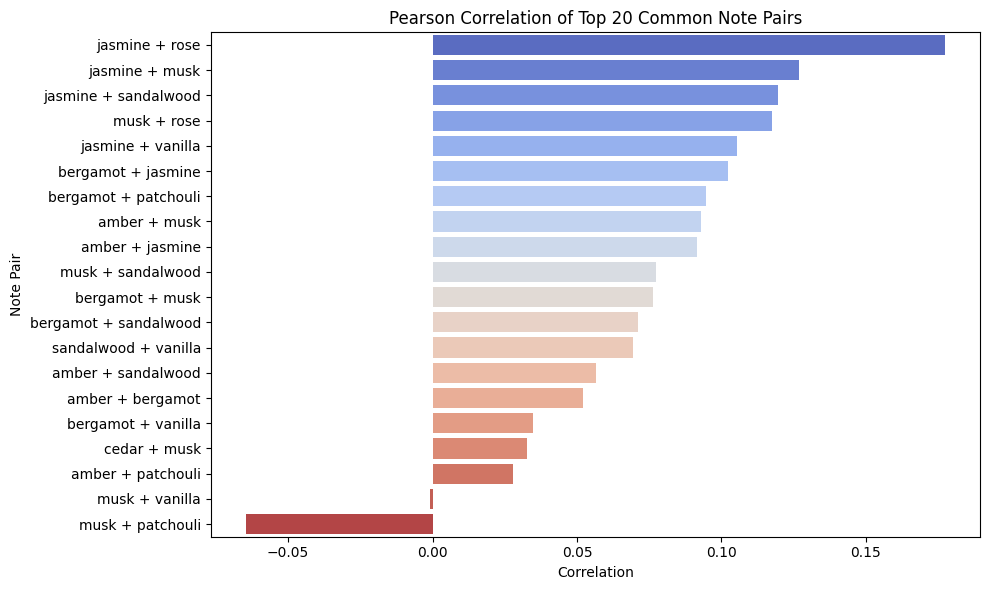

In [63]:
corr_df = pd.DataFrame(pair_correlations, columns=['Pair', 'Correlation'])
corr_df['Pair'] = corr_df['Pair'].apply(lambda x: f"{x[0]} + {x[1]}")
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='coolwarm')
plt.title('Pearson Correlation of Top 20 Common Note Pairs')
plt.xlabel('Correlation')
plt.ylabel('Note Pair')
plt.tight_layout()
plt.show()

While most of the top 20 note pairs show a weak but pearson positive correlation (e.g., jasmine + musk: 0.127; bergamot + jasmine: 0.102), the strength of these associations is relatively low. Only a few pairs, like jasmine and rose (0.177), approach moderate co-occurrence, suggesting that although some notes tend to appear together, the overall pattern of pairing is not strongly structured.

Now we will try a different method of using conditional probability to analyze this. 

In [64]:
print("\nConditional probabilities P(B|A) for top 20 most common note pairs:")
for (note_a, note_b), p_b_given_a in pair_cond_probs:
    print(f"{note_a} + {note_b}: P({note_b}|{note_a}) = {p_b_given_a:.3f}")


Conditional probabilities P(B|A) for top 20 most common note pairs:
bergamot + musk: P(musk|bergamot) = 0.540
jasmine + musk: P(musk|jasmine) = 0.580
musk + sandalwood: P(sandalwood|musk) = 0.397
amber + musk: P(musk|amber) = 0.556
bergamot + jasmine: P(jasmine|bergamot) = 0.405
musk + rose: P(rose|musk) = 0.323
bergamot + sandalwood: P(sandalwood|bergamot) = 0.401
bergamot + patchouli: P(patchouli|bergamot) = 0.386
jasmine + sandalwood: P(sandalwood|jasmine) = 0.438
amber + bergamot: P(bergamot|amber) = 0.429
musk + patchouli: P(patchouli|musk) = 0.300
musk + vanilla: P(vanilla|musk) = 0.296
amber + jasmine: P(jasmine|amber) = 0.404
amber + sandalwood: P(sandalwood|amber) = 0.396
cedar + musk: P(musk|cedar) = 0.520
jasmine + rose: P(rose|jasmine) = 0.379
jasmine + vanilla: P(vanilla|jasmine) = 0.363
bergamot + vanilla: P(vanilla|bergamot) = 0.317
sandalwood + vanilla: P(vanilla|sandalwood) = 0.339
amber + patchouli: P(patchouli|amber) = 0.348


We can already see significant improvements over the previous pearson correlation. Some notes has higher than 50% rate of showing up together.

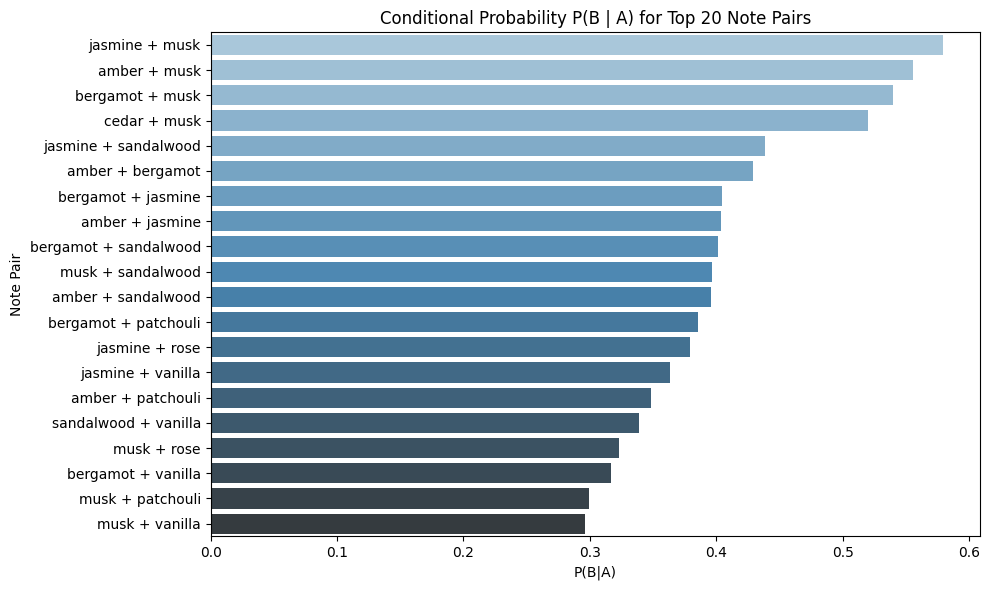

In [65]:
cond_df = pd.DataFrame(pair_cond_probs, columns=['Pair','P(B|A)'])
cond_df['Pair'] = cond_df['Pair'].apply(lambda x: f"{x[0]} + {x[1]}")
cond_df = cond_df.sort_values('P(B|A)', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='P(B|A)', y='Pair', data=cond_df, palette='Blues_d')
plt.title("Conditional Probability P(B | A) for Top 20 Note Pairs")
plt.xlabel("P(B|A)")
plt.ylabel("Note Pair")
plt.tight_layout()
plt.show()

Now that we see the new conditional probability graph, we can see some big improvements over the previous pearson correlation. The bars in the 0.3–0.55 range are a lot more visiable than the tiny Pearson-r values. Our strongest link, jasmine→musk is at ~0.55 (i.e. more than half of all jasmine fragrances also contain musk), suggest a quite strong correlation between these two notes. Even the weakest pairing in the top 20 paris, musk→patchouli at ~0.30, still has a substantial hit-rate.

This confirms our hypothesis that certain notes does tend to appear together more frequently than the others.

# Ethics & Privacy


There are some potential biases in our dataset. One of them is that the reviews and ratings are voluntary in Fragrantica, which may over represent luxury fragrance profiles. Another one would be that certain notes are more prominent in certain regions. Such as oud and spices are more influential in Middle Eastern perfumes. An additional bias would be the lack of demographic representation, including age, gender, and geography. In terms of data privacy, Fragrantica’s content is copyrighted, and using it for educational purposes should be done with caution. Redistribution and commercial use would violate their use. 

In terms of detecting biases before, during, and after communicating our analyses, checking for over representation of brands/perfumes, and exploring the distribution of note frequency vs. rating would help us detect it before. Using variance/standard deviation to see if certain nodes are more polarizing would be an analysis we would be doing after getting the data. After collecting all the necessary data, we use disclaimers when making generalizations about ‘which notes people prefer’. Using a limitations section at the end would help the readers identify biases.

To handle the biases, normalizing the data(to avoid over-representing popular notes), using multiple metrics(variance, number of ratings) may be useful instead of just looking at average ratings.

# Discussion and Conclusion

#### **Heavy Vs. Fresh Notes User Ratings**
We initially hypothesized that fragrances dominated by “heavy” notes (e.g., leather, oud, wood) would have lower average ratings, whereas fragrances with “fresh” notes (e.g., citrus, green tea, orange blossom) would have higher average ratings. However, our results indicate that the reality is quite the opposite. 

The average rating for perfumes with heavy notes was 4.04, compared to 3.97 for fresh-note perfumes, only marginally above the dataset average. Our EDA has supported this conclusion with the t-statistic results: 

**(t = 12.132, p < 0.001)** - Heavy Notes

**(t = 4.213, p < 0.001)** - Fresh Notes

This indicates that, although both are statistically significant, there is a higher positive correlation for heavy notes. During our Lasso Regression, niche, resinous, oud, and woody notes all appeared in the positive tail of the coefficient distribution, while most fruity and delicate floral accords appeared in the negative tail, further reinforcing our result. The above findings highlight that Fragantica users prefer more complex and rich fragrance notes over light and fresh ones, as shown by a more positive correlation between heavy notes and average ratings.


#### **Fragrance Note Co-occurrence Patterns**
In our hypothesis, we also expected that specific fragrance notes would appear together more often than by chance (e.g., green tea and citrus). To test this, we analyzed the top 20 most commonly occurring notes, calculating the Pearson correlation coefficient for each pair to determine whether the presence of one note is positively correlated with the presence of the other. This analysis enabled us to determine how frequently these combinations are used, compared to their use in independent occurrences. Our results revealed that there is a weak positive correlation between the pairs, with the highest correlation being **(0.177)** for jasmine and rose, followed by jasmine and musk **(0.127)**, and jasmine and sandalwood **(0.120)**. While these results suggest a positive co-occurrence trend, it's not enough to prove our hypothesis. 

To strengthen our conclusion and support our hypothesis, we employed conditional probability. Our strongest result, jasmine and musk **(0.58)**, indicates that approximately 58% of jasmine fragrances also contain musk, which significantly improves upon our previous Pearson correlation results. Amber and musk **(0.556)** also had a strong conditional probability, but even the weakest result **(0.30)** for musk and vanilla is enough to prove our hypothesis that some nodes tend to appear together more frequently than others. 

#### **Connection to Prior Work**
Compared to the earlier research discussed in the background section, our findings expand on existing studies by concentrating on note-level correlations with consumer ratings. Rodrigues et al. employed graph neural networks along with a clustering algorithm and k-means to explore fragrance co-occurrence and predict new scent molecules. While their study used network-based models and molecular-level representations, our approach builds on their use of EDA and consumer ratings, but emphasizes statistical testing and modeling with Lasso and XGBoost regressions.

Hanafizadeh et al. explored predicting consumer preferences using neural networks followed by Fuzzy Delphi method, incorporating demographic features, price and size. Our work narrows in on ingredient-level patterns and correlating them with user ratings, offering a deeper insight into how specific fragrance notes drive user preferences. While both papers used advanced machine learning for classification and prediction, our work highlights how even basic statistical methods and note frequency analysis can yield meaningful insights from consumer data.

